## Importing necessary libraries


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

################## evaluation metrics 
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix

################## libraries for the different models 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 

################## libraries for plotting and visualising results 
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate


## function to tabulate evaluation metrics for better communication of results

In [43]:
def add_to_table(table, *args):
    table.append([*args])


# Task1: Dataset description and Exploratory data analysis

In [44]:
################## loading data into a dataframe using read_csv() from pandas 
data = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

################## Integer encoding: replacing string values with numerical values
smoking_history_mapping = {'never': 0, 'No Info': 1, 'current': 2, 'former': 3,'ever': 4, 'not current': 5}
data['smoking_history'] = data['smoking_history'].map(smoking_history_mapping)

gender_mapping = {'Female': 0, 'Male': 1, 'Other': 2}
data['gender'] = data['gender'].map(gender_mapping)

################## Gettting features and output (classification)
X = data.drop('diabetes', axis=1)
y = data['diabetes']

################## Splitting the data into training, validation, and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
x_train_splitted, x_validation, y_train_splitted, y_validation = train_test_split(X_train, y_train,
                                                                                      random_state=104, test_size=1 / 3,
                                                                                      shuffle=True)

## *Task 1.2: using the <code>desribe()</code> and the <code>info()</code> functions*

In [45]:
################## Using the describe function to provide insights on the data
#describe function 
print(data.describe())
print("\n\n #################################### \n")
print(data.info())

              gender            age  hypertension  heart_disease  \
count  100000.000000  100000.000000  100000.00000  100000.000000   
mean        0.414660      41.885856       0.07485       0.039420   
std         0.493031      22.516840       0.26315       0.194593   
min         0.000000       0.080000       0.00000       0.000000   
25%         0.000000      24.000000       0.00000       0.000000   
50%         0.000000      43.000000       0.00000       0.000000   
75%         1.000000      60.000000       0.00000       0.000000   
max         2.000000      80.000000       1.00000       1.000000   

       smoking_history            bmi    HbA1c_level  blood_glucose_level  \
count    100000.000000  100000.000000  100000.000000        100000.000000   
mean          1.306950      27.320767       5.527507           138.058060   
std           1.454501       6.636783       1.070672            40.708136   
min           0.000000      10.010000       3.500000            80.000000   
25

## *Task 1.3: checking for Null or negative values*

In [46]:
################## Checking for null values in the dataframe
nullData = data.isnull().sum()
print(nullData)

#negative values 
negative_values = (data < 0).sum()
print("\nNegative values:")
print(negative_values)


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Negative values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


## *Task 1.4: finding correlation between all feature pairs*

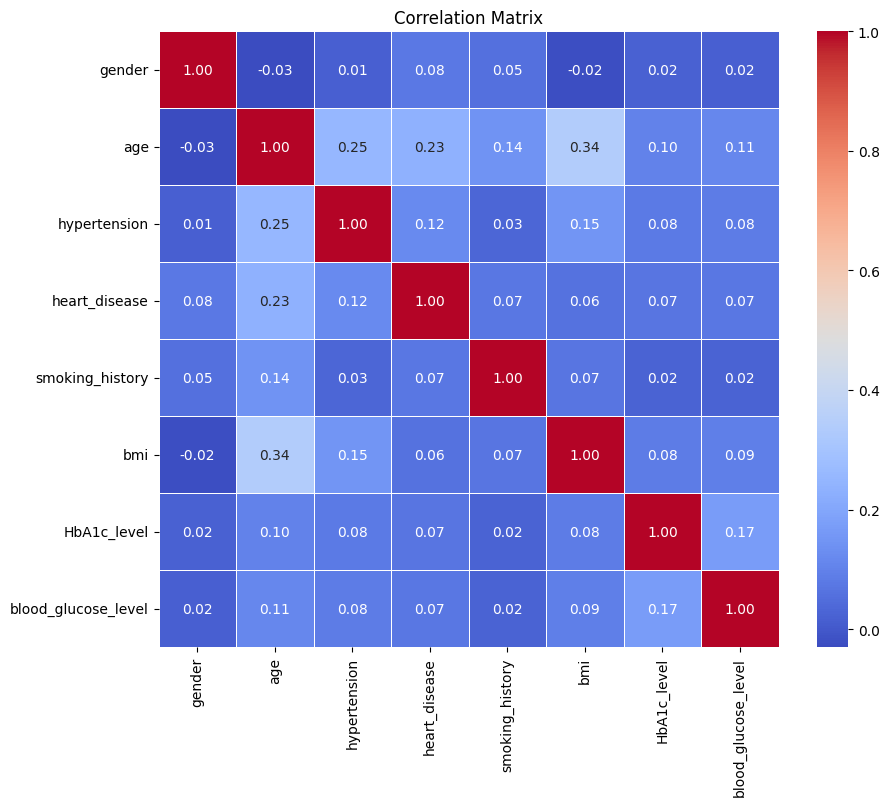




Features with maximum correlation: age and bmi
	Correlation coefficient: 0.3373957761861766

Features with minimum correlation: age and gender
	Correlation coefficient: -0.0306555407834874


In [47]:

correlation_matrix = X.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
# print(data.corr())
# Find pairs of features with maximum correlation
max_correlation = correlation_matrix.unstack().sort_values(ascending=False)
max_correlation_pairs = max_correlation[max_correlation < 1].head(1)
feature1, feature2 = max_correlation_pairs.index[0]

print(f"\n\n\nFeatures with maximum correlation: {feature1} and {feature2}")
print(f"\tCorrelation coefficient: {correlation_matrix.loc[feature1, feature2]}")


min_correlation = correlation_matrix.unstack().sort_values()
min_correlation_pairs = min_correlation.head(1)
feature1_min, feature2_min = min_correlation_pairs.index[0]

print(f"\nFeatures with minimum correlation: {feature1_min} and {feature2_min}")
print(f"\tCorrelation coefficient: {correlation_matrix.loc[feature1_min, feature2_min]}")


## *Task 1.5: plotting feature pairs with most and least correlation*

to show the correlation between the features, we plot the features with minimum and maximum correlation and observe the results.



plotting features with maximim correlation
 


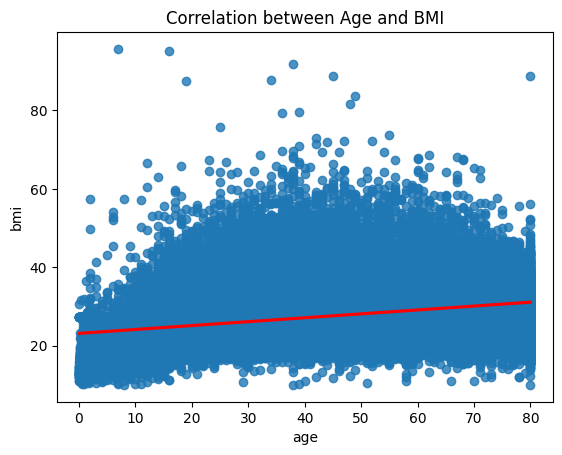



plotting features with minimum correlation
 


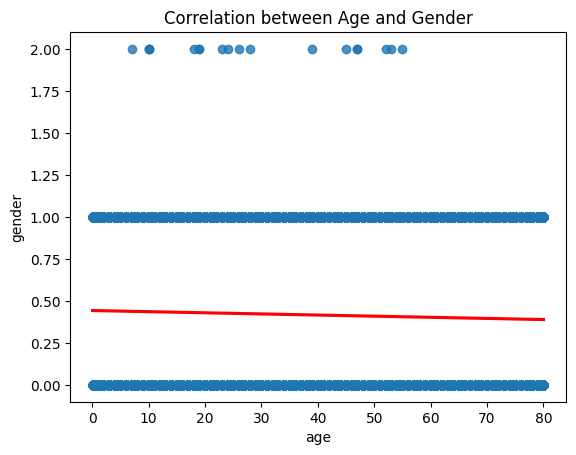

In [48]:
################## plotting features with maximim correlation  
print("\n\nplotting features with maximim correlation\n ")
sns.regplot(x='age', y='bmi', data=data, line_kws={'color': 'red'})
 
 
plt.title('Correlation between Age and BMI')
plt.xlabel('age')
plt.ylabel('bmi')
plt.show()


################## plotting features with minimum correlation 
print("\n\nplotting features with minimum correlation\n ")
sns.regplot(x='age', y='gender', data=data, line_kws={'color': 'red'})
 
plt.title('Correlation between Age and Gender')
plt.xlabel('age')
plt.ylabel('gender')
plt.show()



# Task2: Baseline model

In [49]:
################## tables and headers to communicate results of perforamnce on valildation set
table_k1 = []
table_k3 = [] 
headers = ["Model", "K", "Dist. Metric", "Accuracy", "Recall"]


################## function that takes the number of neighbors and then fits the model on the training data
 

def KNN_function(neighbors =3, metric= 'euclidean'):
    knn_baseline= KNeighborsClassifier(n_neighbors=neighbors, metric=metric)
    
    knn_baseline.fit( X_train, y_train)
    y_pred_baseline_1 = knn_baseline.predict(X_test)
    
    accuracy= knn_baseline.score(X_test, y_test)    
    recall = recall_score(y_test, y_pred_baseline_1) 
        
    return knn_baseline, accuracy, recall



################## trying the KNN with k=1  
knn_baseline_1_1, a1, r1= KNN_function(1, 'euclidean')
add_to_table(table_k1, "knn_baseline_1_1", 1, "euclidean", a1, r1)

################## trying the KNN with k=3 
knn_baseline_3_1, a4, r4= KNN_function(3, 'euclidean')
add_to_table(table_k1, "knn_baseline_3_1", 3, "euclidean", a4, r4)


################## tabulating data 
print(tabulate(table_k1, headers=headers))

Model               K  Dist. Metric      Accuracy    Recall
----------------  ---  --------------  ----------  --------
knn_baseline_1_1    1  euclidean         0.937367  0.57836
knn_baseline_3_1    3  euclidean         0.946933  0.517511


In [50]:
knn_baseline_1_1.fit(X_train, y_train)    
y_pred_knn = knn_baseline_1_1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)

print("Performance of the baseline model on  testing set: \n")
print(f"Accuracy: {accuracy:.2f}" )
print(f"Recall: {recall:.2f}" )
print(f"Precision: {precision:.2f}" )

Performance of the baseline model on  testing set: 

Accuracy: 0.94
Recall: 0.58
Precision: 0.65


# Task3: 

## 3.1_Random Forest 

In [51]:
################## tables and headers to communicate results of perforamnce on valildation set
table_rf = []
headers = ["Model", "max_features",  "Accuracy", "Recall"]

def RandomForest_functin(max_features):
    random= RandomForestClassifier(n_estimators=100, random_state=123, max_features=max_features)
    random.fit(x_train_splitted, y_train_splitted)
    y_val_pred= random.predict(x_validation)
    

    accuracy = random.score(x_validation, y_validation)
    recall = recall_score(y_validation, y_val_pred)

    return random, accuracy, recall



random_1, a1, r1= RandomForest_functin('sqrt')
random_2, a2, r2= RandomForest_functin('log2')
random_3, a3, r3= RandomForest_functin(0.6)
random_4, a4, r4= RandomForest_functin(0.1)

add_to_table(table_rf, "random_1", "sqrt", a1, r1)
add_to_table(table_rf, "random_2", "log2", a2, r2)
add_to_table(table_rf, "random_3", 0.6 , a3, r3)
add_to_table(table_rf, "random_4", 0.1 , a4, r4)

print(tabulate(table_rf, headers=headers))

Model     max_features      Accuracy    Recall
--------  --------------  ----------  --------
random_1  sqrt              0.972401  0.686275
random_2  log2              0.972251  0.690731
random_3  0.6               0.971951  0.696078
random_4  0.1               0.972401  0.685383


In [52]:
random_3.fit(X_train, y_train)    
y_pred_rf_1 = random_3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf_1)
recall = recall_score(y_test, y_pred_rf_1)
precision = precision_score(y_test, y_pred_rf_1)

print("Performance of the selected random forest model on  testing set: \n")
print(f"Accuracy: {accuracy:.2f}" )
print(f"Recall: {recall:.2f}" )
print(f"Precision: {precision:.2f}" )

Performance of the selected random forest model on  testing set: 

Accuracy: 0.97
Recall: 0.69
Precision: 0.95


## 3.2_SVM

In [53]:
table_SVM1 = []
table_SVM2 = []
headers = ["Model", "Kernel", "C", "Accuracy", "Recall"]

def SVM_function(kernel='rbf', C=1):
    svm_model = SVC(C=C, kernel=kernel, random_state=42)
    
    svm_model.fit(x_train_splitted, y_train_splitted)
    y_val_pred= svm_model.predict(x_validation)
    
    accuracy = svm_model.score(x_validation, y_validation)
    recall = recall_score(y_validation, y_val_pred)

    
    return svm_model, accuracy, recall
    


svm_model_1, a1, r1 = SVM_function('linear')
svm_model_2, a2, r2 = SVM_function('poly')
svm_model_3, a3, r3 = SVM_function('rbf') 
svm_model_4, a4, r4 = SVM_function('sigmoid')

add_to_table(table_SVM1, "svm_model_1", "linear", 1, a1, r1)
add_to_table(table_SVM1,"svm_model_2", "poly", 1, a2, r2)
add_to_table(table_SVM1,"svm_model_3", "rbf", 1, a3, r3)
add_to_table(table_SVM1,"svm_model_4", "sigmoid", 1, a4, r4)



C= [0.1, 1, 5, 10]
count=0
for i in C:
    count+=1
    svm_model_1, a, r = SVM_function('linear', i)
    add_to_table(table_SVM2, f"svm_model_{count}", "linear", f"{i}", a , r )


print("\n ******************************************* \n \t  tuning the kernel parameter: ")
print(tabulate(table_SVM1, headers=headers))
print("\n ******************************************* \n \t tuning parameter C: ")
print(tabulate(table_SVM2, headers=headers))


 ******************************************* 
 	  tuning the kernel parameter: 
Model        Kernel      C    Accuracy    Recall
-----------  --------  ---  ----------  --------
svm_model_1  linear      1    0.959952  0.571301
svm_model_2  poly        1    0.949228  0.410873
svm_model_3  rbf         1    0.944353  0.338681
svm_model_4  sigmoid     1    0.862532  0

 ******************************************* 
 	 tuning parameter C: 
Model        Kernel       C    Accuracy    Recall
-----------  --------  ----  ----------  --------
svm_model_1  linear     0.1    0.959877  0.569519
svm_model_2  linear     1      0.959952  0.571301
svm_model_3  linear     5      0.959427  0.590909
svm_model_4  linear    10      0.958077  0.592692


In [54]:
svm_model_1, a1, r1 = SVM_function('linear', 0.1)    

svm_model_1.fit(X_train, y_train) 
y_pred_SVM_1 = svm_model_1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_SVM_1)
recall = recall_score(y_test, y_pred_SVM_1)
precision = precision_score(y_test, y_pred_SVM_1)

print("Performance of the selected SVM model on the testing set: \n")
print(f"Accuracy: {accuracy:.2f}" )
print(f"Recall: {recall:.2f}" )
print(f"Precision: {precision:.2f}" )
 


Performance of the selected SVM model on the testing set: 

Accuracy: 0.96
Recall: 0.57
Precision: 0.93


# Task4: Performance analysis

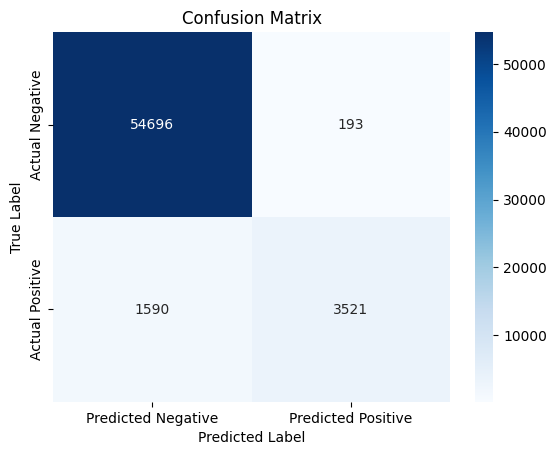

Performance of the best model (random forest) on the testing set: 

Accuracy: 0.9702833333333334
Recall: 0.6889062805713168
Precision: 0.9480344641895531


In [55]:
random_3.fit(X_train, y_train) 
y_pred_test = random_3.predict(X_test)
 
conf_matrix = confusion_matrix(y_test, y_pred_test)
 
conf_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


 
accuracy = accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)

print("Performance of the best model (random forest) on the testing set: \n")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)


Class Distribution:
diabetes
0    91500
1     8500
Name: count, dtype: int64

Minority Class: 1
Majority Class: 0


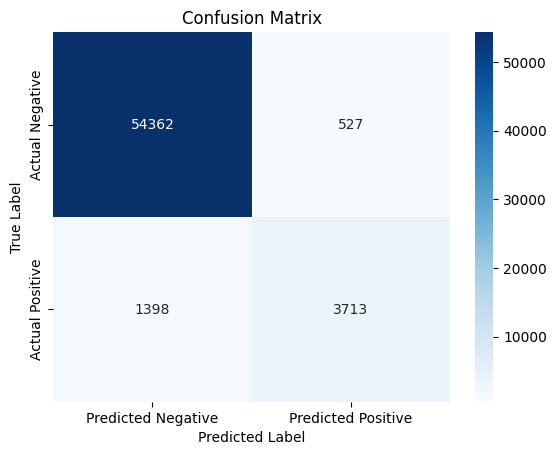

Performance of the best model (random forest) after enhancement:  

Accuracy: 0.9679166666666666
Recall: 0.7264723146155351
Precision: 0.8757075471698114


In [56]:
class_distribution = data['diabetes'].value_counts()

minority_class = class_distribution.idxmin()
majority_class = class_distribution.idxmax()

 
print("Class Distribution:")
print(class_distribution)

print("\nMinority Class:", minority_class)
print("Majority Class:", majority_class)

class_weight = {0: 1, 1: 4}   
 
random_tuned = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight=class_weight)
 
random_tuned.fit(x_train_splitted, y_train_splitted)
y_pred_test= random_tuned.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_test)
conf_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

 
accuracy = accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)

print("Performance of the best model (random forest) after enhancement:  \n")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)